In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from datetime import timedelta

In [2]:
# Augmented Dickey-Fuller test: a statistical hypothesis test on if data has a trend
from statsmodels.tsa.stattools import adfuller
# Decompose seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
# Granger causality test: a statistical hypothesis test for determining whether one time series is useful in forecasting another
from statsmodels.tsa.stattools import grangercausalitytests

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# the statsmodels output is ugly and unlabeled, lets use a function to format it nicely
def adf_output(dftest):
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# of Lags Used','Number of Observations Used'])

    # the last element is a dictionary to unpack
    for key,value in dftest[4].items(): 
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [4]:
df_weather = pd.read_csv('la_guardia_airport_2017.csv', parse_dates=['time_stamp'])

In [5]:
df_weather.head(3) #temperature data stops at 2018-01-20 23:00:00 GMT

,time_stamp,temp
0,2016-01-01 00:00:00,46.0
1,2016-01-01 01:00:00,45.0
2,2016-01-01 02:00:00,45.0


In [6]:
df_weather.tail(1)

,time_stamp,temp
18023,2018-01-20 23:00:00,48.0


In [7]:
df_weather['time_stamp_GMT'] = df_weather.time_stamp

In [8]:
df_weather.head()

,time_stamp,temp,time_stamp_GMT
0,2016-01-01 00:00:00,46.0,2016-01-01 00:00:00
1,2016-01-01 01:00:00,45.0,2016-01-01 01:00:00
2,2016-01-01 02:00:00,45.0,2016-01-01 02:00:00
3,2016-01-01 03:00:00,44.0,2016-01-01 03:00:00
4,2016-01-01 04:00:00,43.0,2016-01-01 04:00:00


In [9]:
df_weather.set_index('time_stamp', inplace = True)

In [10]:
df_weather.set_index(df_weather.index.tz_localize('GMT'), inplace = True)

In [11]:
df_weather.head()

,temp,time_stamp_GMT
time_stamp,,
2016-01-01 00:00:00+00:00,46.0,2016-01-01 00:00:00
2016-01-01 01:00:00+00:00,45.0,2016-01-01 01:00:00
2016-01-01 02:00:00+00:00,45.0,2016-01-01 02:00:00
2016-01-01 03:00:00+00:00,44.0,2016-01-01 03:00:00
2016-01-01 04:00:00+00:00,43.0,2016-01-01 04:00:00


In [12]:
df_weather.set_index(df_weather.index.tz_convert('US/Eastern'), inplace = True)

In [13]:
df_weather.head()

,temp,time_stamp_GMT
time_stamp,,
2015-12-31 19:00:00-05:00,46.0,2016-01-01 00:00:00
2015-12-31 20:00:00-05:00,45.0,2016-01-01 01:00:00
2015-12-31 21:00:00-05:00,45.0,2016-01-01 02:00:00
2015-12-31 22:00:00-05:00,44.0,2016-01-01 03:00:00
2015-12-31 23:00:00-05:00,43.0,2016-01-01 04:00:00


In [14]:
df_weather.reset_index(inplace=True)

In [15]:
df_weather.head()

,time_stamp,temp,time_stamp_GMT
0,2015-12-31 19:00:00-05:00,46.0,2016-01-01 00:00:00
1,2015-12-31 20:00:00-05:00,45.0,2016-01-01 01:00:00
2,2015-12-31 21:00:00-05:00,45.0,2016-01-01 02:00:00
3,2015-12-31 22:00:00-05:00,44.0,2016-01-01 03:00:00
4,2015-12-31 23:00:00-05:00,43.0,2016-01-01 04:00:00


In [16]:
df_weather.loc[:,'time_stamp'] = df_weather.loc[:,'time_stamp'].astype(str).str[:-6]

In [17]:
df_weather.head()

,time_stamp,temp,time_stamp_GMT
0,2015-12-31 19:00:00,46.0,2016-01-01 00:00:00
1,2015-12-31 20:00:00,45.0,2016-01-01 01:00:00
2,2015-12-31 21:00:00,45.0,2016-01-01 02:00:00
3,2015-12-31 22:00:00,44.0,2016-01-01 03:00:00
4,2015-12-31 23:00:00,43.0,2016-01-01 04:00:00


In [18]:
df_weather.columns = ['time_stamp_local', 'temp', 'time_stamp']

In [19]:
df_weather.dtypes

time_stamp_local            object
temp                       float64
time_stamp          datetime64[ns]
dtype: object

In [20]:
df_weather = df_weather.loc[:,['time_stamp', 'temp', 'time_stamp_local']]

In [21]:
df_weather.head()

,time_stamp,temp,time_stamp_local
0,2016-01-01 00:00:00,46.0,2015-12-31 19:00:00
1,2016-01-01 01:00:00,45.0,2015-12-31 20:00:00
2,2016-01-01 02:00:00,45.0,2015-12-31 21:00:00
3,2016-01-01 03:00:00,44.0,2015-12-31 22:00:00
4,2016-01-01 04:00:00,43.0,2015-12-31 23:00:00


In [22]:
df_weather.to_csv('la_guardia_airport_2017_local_time.csv', index = False)

In [23]:
del df_weather

In [24]:
df_weather = pd.read_csv('la_guardia_airport_2017_local_time.csv', parse_dates=['time_stamp', 'time_stamp_local'])

In [25]:
df_weather.head()

,time_stamp,temp,time_stamp_local
0,2016-01-01 00:00:00,46.0,2015-12-31 19:00:00
1,2016-01-01 01:00:00,45.0,2015-12-31 20:00:00
2,2016-01-01 02:00:00,45.0,2015-12-31 21:00:00
3,2016-01-01 03:00:00,44.0,2015-12-31 22:00:00
4,2016-01-01 04:00:00,43.0,2015-12-31 23:00:00


In [26]:
df_weather.dtypes

time_stamp          datetime64[ns]
temp                       float64
time_stamp_local    datetime64[ns]
dtype: object

In [29]:
# read data into pandas dataframe
df_price = pd.read_csv('nyiso_NYC_price.csv', parse_dates=['time_stamp', 'time_stamp_local'])
df_load = pd.read_csv('nyiso_NYC_load.csv', parse_dates=['time_stamp', 'time_stamp_local'])
df_temp = pd.read_csv('la_guardia_airport_2017_local_time.csv', parse_dates=['time_stamp', 'time_stamp_local'])

In [30]:
df_price.head() # nyiso data starts at 2017-01-01 05:05:00 GMT

,time_stamp,price,time_stamp_local
0,2016-01-01 05:00:00,61.48,2016-01-01 00:00:00
1,2016-01-01 06:00:00,65.43,2016-01-01 01:00:00
2,2016-01-01 07:00:00,17.58,2016-01-01 02:00:00
3,2016-01-01 08:00:00,9.01,2016-01-01 03:00:00
4,2016-01-01 09:00:00,2.31,2016-01-01 04:00:00


In [31]:
df_price.tail()

,time_stamp,price,time_stamp_local
18283,2018-02-01 00:00:00,54.30,2018-01-31 19:00:00
18284,2018-02-01 01:00:00,77.99,2018-01-31 20:00:00
18285,2018-02-01 02:00:00,64.53,2018-01-31 21:00:00
18286,2018-02-01 03:00:00,35.49,2018-01-31 22:00:00
18287,2018-02-01 04:00:00,31.48,2018-01-31 23:00:00


In [32]:
df_price.columns, df_load.columns, df_weather.columns #, df_nyc_taxi.columns

(Index([u'time_stamp', u'price', u'time_stamp_local'], dtype='object'),
 Index([u'time_stamp', u'load', u'time_stamp_local'], dtype='object'),
 Index([u'time_stamp', u'temp', u'time_stamp_local'], dtype='object'))

In [13]:
select_weather_index = df_weather.time_stamp >= pd.datetime(2018, 1, 14, 5)
df_weather = df_weather.loc[select_weather_index, :]

In [14]:
df_weather.head()

,time_stamp,temp,time_stamp_local
0,2018-01-14 05:00:00,19.0,2018-01-14 00:00:00
1,2018-01-14 06:00:00,18.5,2018-01-14 01:00:00
2,2018-01-14 07:00:00,17.0,2018-01-14 02:00:00
3,2018-01-14 08:00:00,17.0,2018-01-14 03:00:00
4,2018-01-14 09:00:00,17.0,2018-01-14 04:00:00


In [15]:
#df_weather = df_weather.set_index(df_weather.time_stamp_local).tz_localize(None)

In [16]:
#df_weather.loc[:, 'time_stamp_local'] = df_weather.index

In [17]:
select_price_index = (df_price.time_stamp >= pd.datetime(2018, 1, 14, 5)) & (df_price.time_stamp <= pd.datetime(2018, 1, 20, 5))
df_price = df_price.loc[select_price_index, :]
select_load_index = (df_load.time_stamp >= pd.datetime(2018, 1, 14, 5)) & (df_load.time_stamp <= pd.datetime(2018, 1, 20, 5))
df_load = df_load.loc[select_load_index, :]

In [18]:
df_price.shape, df_load.shape, df_weather.shape #, df_nyc_taxi.shape

((1749, 3), (1749, 3), (163, 3))

In [19]:
dftest_price = adfuller(df_price.loc[:,'lbmp_price'], autolag='AIC')
adf_output(dftest_price)

Test Statistic                   -4.552481
p-value                           0.000158
# of Lags Used                   24.000000
Number of Observations Used    1724.000000
Critical Value (5%)              -2.863218
Critical Value (1%)              -3.434149
Critical Value (10%)             -2.567663
dtype: float64


In [20]:
dftest_load = adfuller(df_load.loc[:,'load'], autolag='AIC')
adf_output(dftest_load)

Test Statistic                -6.790703e+00
p-value                        2.368778e-09
# of Lags Used                 1.600000e+01
Number of Observations Used    1.732000e+03
Critical Value (5%)           -2.863210e+00
Critical Value (1%)           -3.434131e+00
Critical Value (10%)          -2.567659e+00
dtype: float64


In [21]:
dftest_weather = adfuller(df_weather.loc[:,'temp'], autolag='AIC')
adf_output(dftest_weather)

Test Statistic                  -1.758690
p-value                          0.401155
# of Lags Used                   3.000000
Number of Observations Used    159.000000
Critical Value (5%)             -2.879895
Critical Value (1%)             -3.472161
Critical Value (10%)            -2.576557
dtype: float64


In [22]:
# fig, ax = plt.subplots(figsize = (16, 9))
# ax.plot(df_price.iloc[:,0], df_price.iloc[:,1], label = 'electricity price')
# ax.plot(df_nyc_taxi.iloc[:,0], df_nyc_taxi.iloc[:,1]/max(df_nyc_taxi.iloc[:,1]), label = 'passengers count')
# #ax.plot(df_weather.iloc[:,0], df_weather.iloc[:,4]/max(df_weather.iloc[:,4]), label = 'tmin')
# ax.legend()
# ax.set_xlim(pd.datetime(2017,2,1), pd.datetime(2017,2,8))

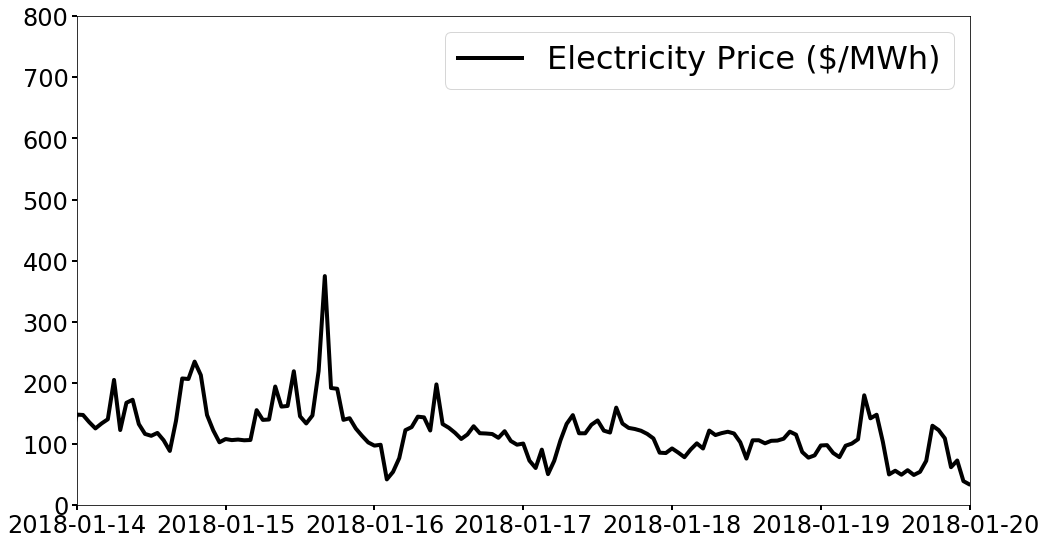

In [33]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.plot(df_price.iloc[:,2], df_price.iloc[:,1], color = 'black', linewidth = 4, label = 'Electricity Price ($/MWh)')
#ax.plot(df_load.iloc[:,0], df_load.iloc[:,1], label = 'electricity load')
#ax.plot(df_weather.iloc[:,0], df_weather.iloc[:,1]/max(df_weather.iloc[:,1]), label = 'temp')
ax.legend(fontsize = 32)
ax.set_xlim(pd.datetime(2018,1,14), pd.datetime(2018,1,20))
ax.set_ylim(0, 800)
ax.tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');
plt.savefig('price_2018.pdf', format = 'pdf')

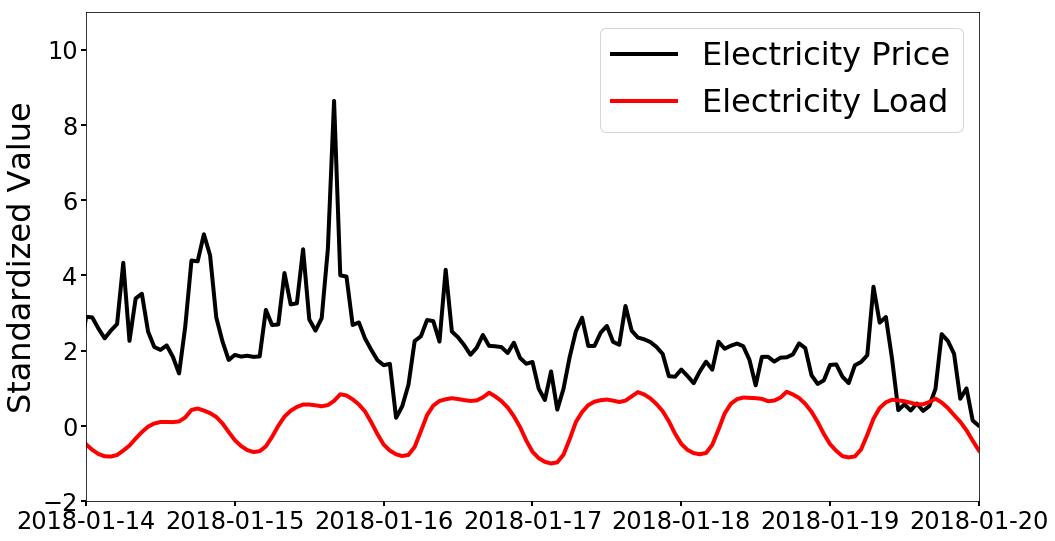

In [34]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.plot(df_price.iloc[:,2], preprocessing.scale(df_price.iloc[:,1]), linewidth = 4, 
        color = 'black', label = 'Electricity Price')
ax.plot(df_load.iloc[:,2], preprocessing.scale(df_load.iloc[:,1]), linewidth = 4
        , color = 'red', label = 'Electricity Load')
#ax.plot(df_weather.iloc[:,0], df_weather.iloc[:,1]/max(df_weather.iloc[:,1]), label = 'temp')
ax.legend(fontsize = 32)
ax.set_ylabel('Standardized Value', fontsize = 32)
ax.set_xlim(pd.datetime(2018,1,14), pd.datetime(2018,1,20))
ax.set_ylim(-2, 11)
ax.tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');
plt.savefig('price_load_2018.pdf', format = 'pdf')

In [37]:
df_price.columns

Index([u'time_stamp', u'price', u'time_stamp_local'], dtype='object')

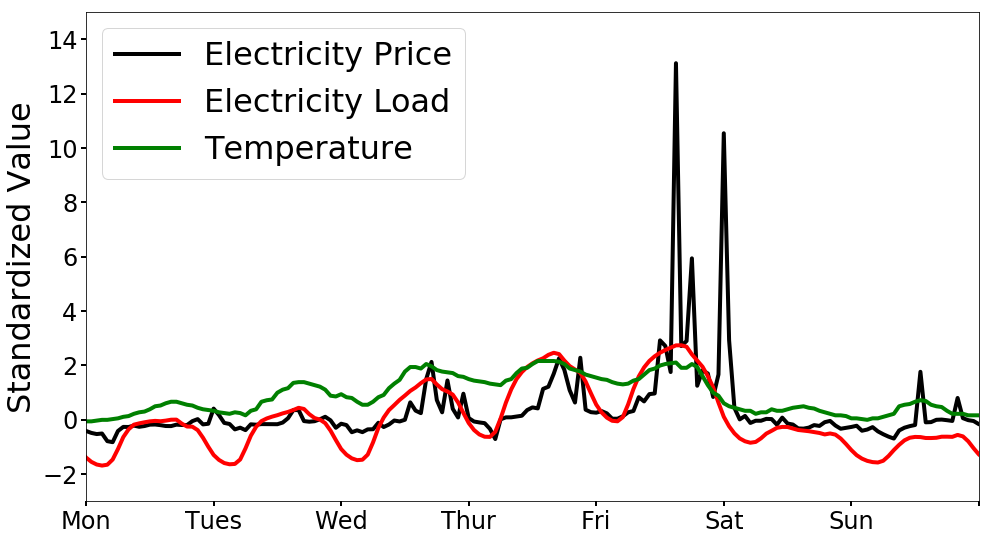

In [57]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.plot(df_price.iloc[:,2], preprocessing.scale(df_price.iloc[:,1]), linewidth = 4
        , color = 'black', label = 'Electricity Price')
ax.plot(df_load.iloc[:,2], preprocessing.scale(df_load.iloc[:,1]), linewidth = 4
        , color = 'red', label = 'Electricity Load')
ax.plot(df_weather.iloc[:,2], preprocessing.scale(df_weather.iloc[:,1]), linewidth = 4
        , color = 'green', label = 'Temperature')
ax.legend(fontsize = 32)
ax.set_ylabel('Standardized Value', fontsize = 32)
ax.set_xlim(pd.datetime(2017,5,15), pd.datetime(2017,5,22))
ax.set_ylim(-3, 15)

new_tick_locs = [x + 0.5 for x in ax.get_xticks()]
new_tick_labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
#ax.set_xticks(new_tick_locs)
ax.set_xticklabels(new_tick_labels)


ax.tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

plt.savefig('price_load_temp_2018.pdf', format = 'pdf')

[ 736465.   736465.5  736466.   736466.5  736467.   736467.5  736468. ]


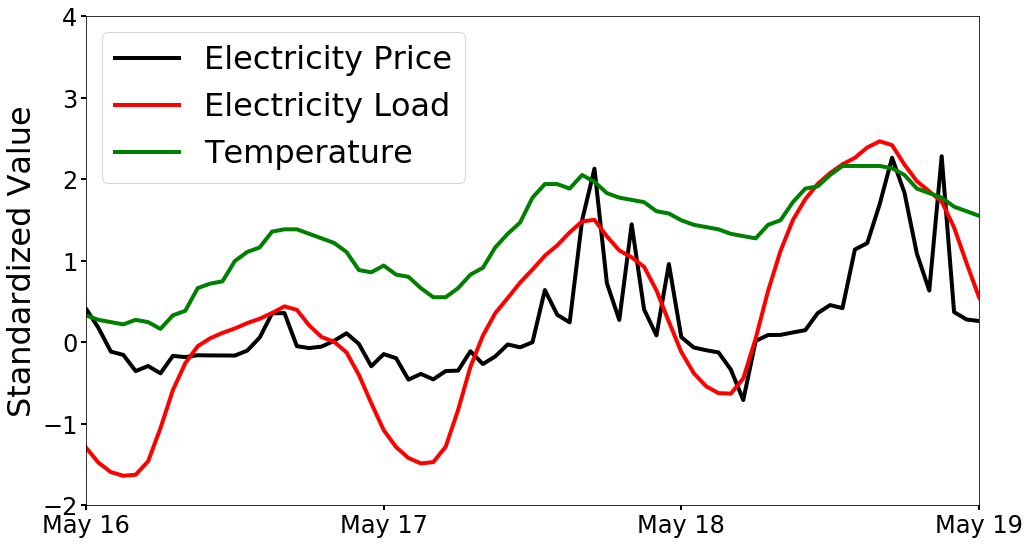

In [77]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.plot(df_price.iloc[:,2], preprocessing.scale(df_price.iloc[:,1]), linewidth = 4
        , color = 'black', label = 'Electricity Price')
ax.plot(df_load.iloc[:,2], preprocessing.scale(df_load.iloc[:,1]), linewidth = 4
        , color = 'red', label = 'Electricity Load')
ax.plot(df_weather.iloc[:,2], preprocessing.scale(df_weather.iloc[:,1]), linewidth = 4
        , color = 'green', label = 'Temperature')
ax.legend(fontsize = 32)
ax.set_ylabel('Standardized Value', fontsize = 32)
ax.set_xlim(pd.datetime(2017,5,16), pd.datetime(2017,5,19))
ax.set_ylim(-2, 4)
print(ax.get_xticks())
new_tick_locs = [736465., 736466., 736467, 736468]
new_tick_labels = ['May 16', 'May 17', 'May 18', 'May 19']
ax.set_xticks(new_tick_locs)
ax.set_xticklabels(new_tick_labels)


ax.tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');

plt.savefig('price_load_temp_day.pdf', format = 'pdf')

<a id='trend-removal'></a>
### Removing Trend to Make a Time Series Stationary

The simplest way to estimate and remove trend is to calculate a rolling mean and subtract it out:

In [28]:
# calculate rolling mean
win = 12
rollMean_price = df_price.loc[:,'lbmp_price'].rolling(window=win, center=False).mean()

# subtract mean
demeaned_price = df_price.loc[:,'lbmp_price'] - rollMean_price
demeaned_price.dropna(inplace=True)

# did this do anything for our stationarity?
demeaned_adf_price = adfuller(demeaned_price, autolag='AIC')
adf_output(demeaned_adf_price)

Test Statistic                -1.068475e+01
p-value                        3.858948e-19
# of Lags Used                 2.400000e+01
Number of Observations Used    1.713000e+03
Critical Value (5%)           -2.863229e+00
Critical Value (1%)           -3.434173e+00
Critical Value (10%)          -2.567669e+00
dtype: float64


In [30]:
# calculate rolling mean
win = 12
rollMean_load = df_load.loc[:,'load'].rolling(window=win, center=False).mean()

# subtract mean
demeaned_load = df_load.loc[:,'load'] - rollMean_load
demeaned_load.dropna(inplace=True)

# did this do anything for our stationarity?
demeaned_adf_load = adfuller(demeaned_load, autolag='AIC')
adf_output(demeaned_adf_load)

Test Statistic                   -5.203512
p-value                           0.000009
# of Lags Used                   23.000000
Number of Observations Used    1714.000000
Critical Value (5%)              -2.863228
Critical Value (1%)              -3.434171
Critical Value (10%)             -2.567669
dtype: float64


In [32]:
# calculate rolling mean
win = 12
rollMean_weather = df_weather.loc[:,'temp'].rolling(window=win, center=False).mean()

# subtract mean
demeaned_weather = df_weather.loc[:,'temp'] - rollMean_weather
demeaned_weather.dropna(inplace=True)

# did this do anything for our stationarity?
demeaned_adf_weather = adfuller(demeaned_weather, autolag='AIC')
adf_output(demeaned_adf_weather)

Test Statistic                  -5.101262
p-value                          0.000014
# of Lags Used                   3.000000
Number of Observations Used    148.000000
Critical Value (5%)             -2.881275
Critical Value (1%)             -3.475325
Critical Value (10%)            -2.577293
dtype: float64


In [46]:
demeaned_price.head()

109818   -12.387500
109819     1.711667
109820     0.464167
109821    -7.985833
109822    -0.020833
Name: lbmp_price, dtype: float64

In [47]:
demeaned_load.head()

102824   -88.666667
102825   -98.300000
102826   -83.991667
102827   -95.550000
102828   -86.300000
Name: load, dtype: float64

In [43]:
# create a 2d dataframe to test if electricity load is caused by traffic
granger = pd.DataFrame({'price': demeaned_price, 'load': demeaned_load})
granger = granger.dropna()

If you observe a p-value less than .05 for a given test, then the data are consistent with your second column Granger-causing the first column (or a lagged version of the second column Granger-causing the first). Here you see that the data are consistent with granger causality all the way back to a year.

In [44]:
granger

,load,price


In [45]:
granger_test = grangercausalitytests(granger, maxlag=1)

ValueError: Insufficient observations. Maximum allowable lag is -2